# 

In [167]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
import numpy as np
from numpy import ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmocean

import xarray as xr

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 18.5
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

<Figure size 3840x2880 with 0 Axes>

<Figure size 3840x2880 with 0 Axes>

## Wind Contours

In [3]:
era5_data = xr.open_dataset(r'./out.nc')

In [58]:
era5_data

<xarray.Dataset>
Dimensions:     (valid_time: 98, longitude: 51, latitude: 26)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2019-10-29T23:00:00 ... 2019-11-03
  * longitude   (longitude) float64 -80.5 -80.4 -80.3 ... -75.7 -75.6 -75.5
  * latitude    (latitude) float64 45.0 44.9 44.8 44.7 ... 42.8 42.7 42.6 42.5
Data variables:
    u10         (valid_time, latitude, longitude) float32 5.334 5.069 ... 1.103
    v10         (valid_time, latitude, longitude) float32 -3.029 -3.04 ... 1.58
    sp          (valid_time, latitude, longitude) float32 ...
Attributes:
    CDI:                     Climate Data Interface version 2.0.4 (https://mp...
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    history:                 Sun Jan 05 16:20:48 2025: cdo mergetime Oct-29.n...
    CDO:                     Climate Data Operators version 2.0.4 (https://mp...

In [4]:
era5_data.longitude.values

array([-80.5, -80.4, -80.3, -80.2, -80.1, -80. , -79.9, -79.8, -79.7,
       -79.6, -79.5, -79.4, -79.3, -79.2, -79.1, -79. , -78.9, -78.8,
       -78.7, -78.6, -78.5, -78.4, -78.3, -78.2, -78.1, -78. , -77.9,
       -77.8, -77.7, -77.6, -77.5, -77.4, -77.3, -77.2, -77.1, -77. ,
       -76.9, -76.8, -76.7, -76.6, -76.5, -76.4, -76.3, -76.2, -76.1,
       -76. , -75.9, -75.8, -75.7, -75.6, -75.5])

In [5]:
lat = era5_data.latitude.values
lon = era5_data.longitude.values
lon2D, lat2D = np.meshgrid(lon,lat)

In [7]:
vmag = ((era5_data.u10.values)**2.0+(era5_data.v10.values)**2.0)**0.5

In [31]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
# import salem
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized
import shapefile as shp  # Requires the pyshp package
%matplotlib inline
def plot_contours_vmag(time_step,save_name):
    
    plt.tight_layout()
    aspectRatio = 10/8
    cmap = cmocean.cm.dense

    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111,projection=proj)
    
    ax.set_extent([-76,-80,43,44.5],crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(-80,-76+1,1.0))
    ax.set_yticks(np.arange(43,44.5+0.5,0.5))
    # not showing NSEW
    cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
    lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
    lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    ax.coastlines()
    ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)
    ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=10, edgecolor='goldenrod', facecolor='none', linewidth=1.6)

    # fig, ax = plt.subplots(figsize = (15, 9))
    # tcf = ax.contourf(lon2D, lat2D, vmag[time_step], levels = np.arange(0, 11, 1), cmap="RdBu_r",extend='both')
    tcf = ax.contourf(lon2D,lat2D,vmag[time_step],levels = np.arange(0, 13, 1),cmap=cmap,extend='both')
    ax.quiver(lon2D, lat2D, era5_data.u10.values[time_step], era5_data.v10.values[time_step],units='width',pivot='tip',width=0.001,scale=250,
              headwidth=5., headlength=3.2, color='m')
    # divider = make_axes_locatable(ax)
    # cax = divider.new_vertical(size='22.5%', pad=1.0)
    # fig.colorbar(tcf, cax=cax, ax=ax, orientation='horizontal')
    cb = fig.colorbar(tcf, extend='both',orientation='horizontal', location='top')
    cb.set_label(r'$\sqrt{u_{10}^2+v_{10}^2}$\,{\rm (m/s)}')

    fig.savefig(save_name, dpi=400)

In [8]:
len(era5_data.u10.values)

98

<Figure size 640x480 with 0 Axes>

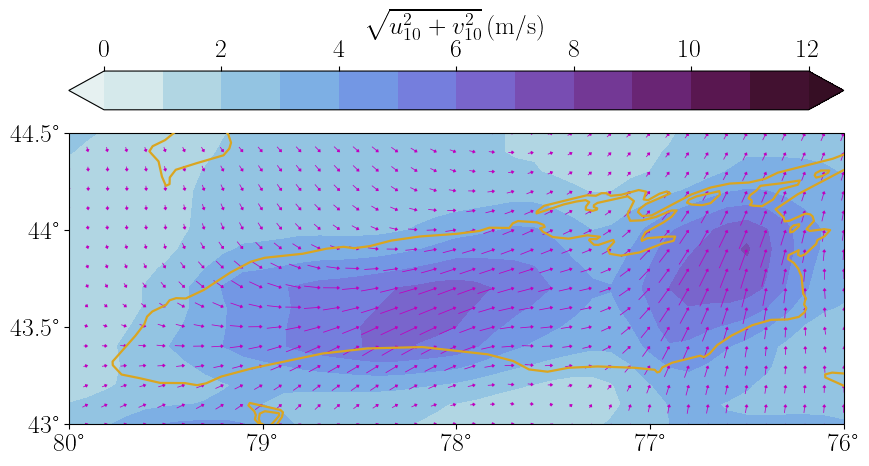

In [33]:
plot_contours_vmag(1, r'n=2')

<Figure size 640x480 with 0 Axes>

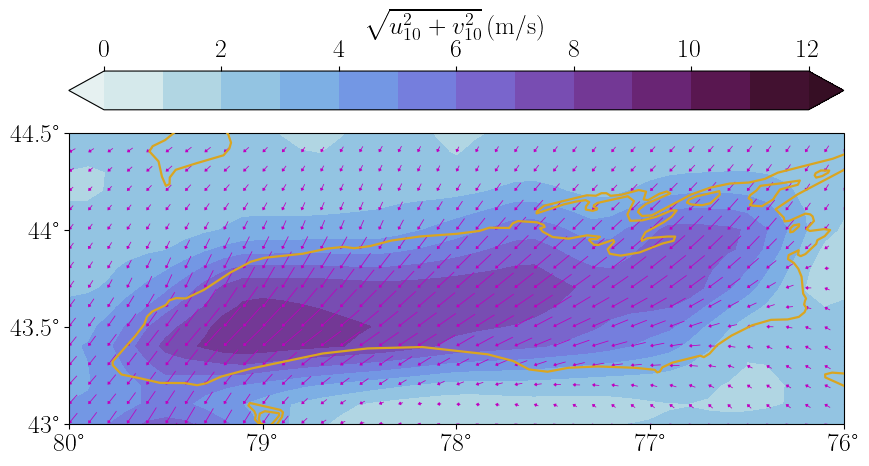

In [35]:
plot_contours_vmag(25, r'n=26')

<Figure size 640x480 with 0 Axes>

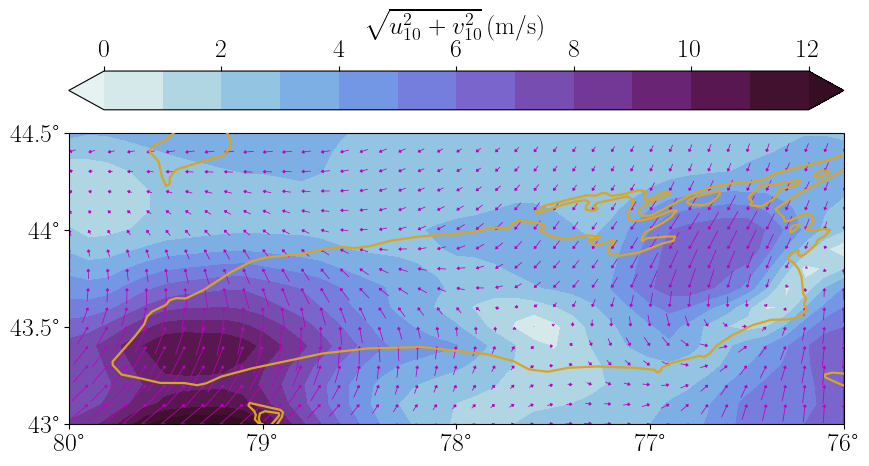

In [37]:
plot_contours_vmag(49, r'n=50')

<Figure size 640x480 with 0 Axes>

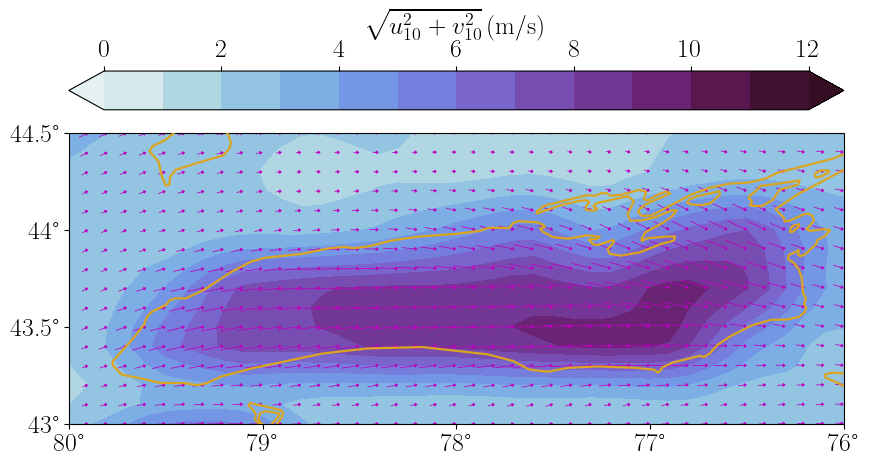

In [39]:
plot_contours_vmag(73, r'n=74')

## Statistic of the wind

In [32]:
np.mean(vmag[0])
vmag[0]

array([[6.133936 , 5.9107766, 5.6337337, ..., 2.3697913, 2.3290987,
        2.2967296],
       [5.6656337, 5.6794887, 5.677564 , ..., 2.2407634, 2.2444813,
        2.2556694],
       [5.106066 , 5.3041463, 5.518635 , ..., 2.165052 , 2.196487 ,
        2.2416577],
       ...,
       [5.0324183, 5.0971103, 5.134988 , ..., 2.9790196, 2.9835155,
        2.9766467],
       [6.300373 , 6.3918667, 6.438135 , ..., 2.8449   , 2.8667529,
        2.8525734],
       [6.513813 , 6.5740476, 6.5694733, ..., 2.6887007, 2.694905 ,
        2.6817138]], dtype=float32)

<Figure size 640x480 with 0 Axes>

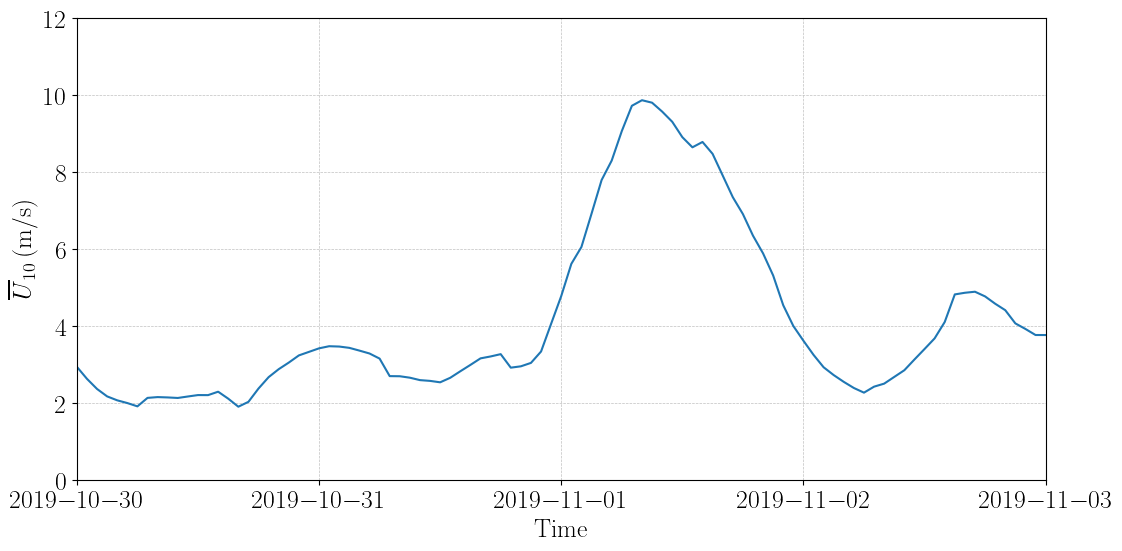

In [88]:
import pandas as pd
mean_wind = np.zeros(len(era5_data.valid_time.values))
for i in range(len(era5_data.valid_time.values)):
    mean_wind[i] = np.mean(vmag[i])

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(era5_data.valid_time.values, mean_wind, linewidth = 1.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
ax.set_ylim([0, 12])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$\overline{U}_{10}$\,{\rm (m/s)}')

fig.savefig("wind-stat_mean", dpi=400)

<Figure size 640x480 with 0 Axes>

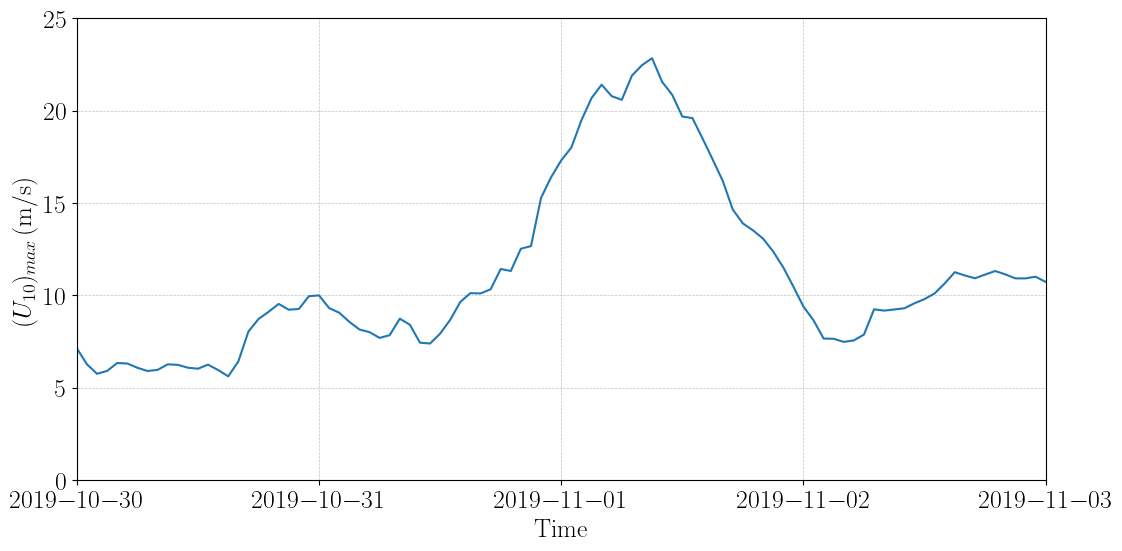

In [47]:
import pandas as pd
mean_wind = np.zeros(len(era5_data.valid_time.values))
for i in range(len(era5_data.valid_time.values)):
    mean_wind[i] = np.max(vmag[i])

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(era5_data.valid_time.values, mean_wind, linewidth = 1.5)

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
ax.set_ylim([0, 25.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'$({U}_{10})_{max}$\,{\rm (m/s)}')

fig.savefig("wind-stat_max", dpi=400)

## Time series at recording stations

<Figure size 640x480 with 0 Axes>

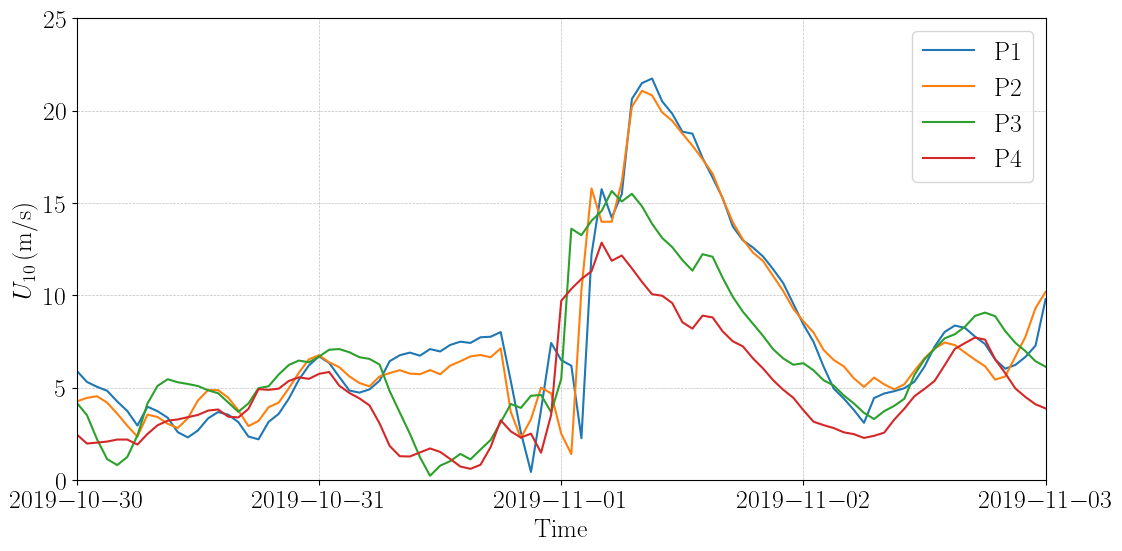

In [139]:
from scipy.interpolate import griddata

lon_st1 = -76.87
lat_st1 = 43.78
lon_st2 = -77.399
lat_st2 = 43.621
lon_st3 = -78.98
lat_st3 = 43.77
lon_st4 = -79.53
lat_st4 = 43.25

outputs1 =  np.empty((0,2))
outputs2 =  np.empty((0,2))
outputs3 =  np.empty((0,2))
outputs4 =  np.empty((0,2))

lon_st1 = -76.87
lon = era5_data.longitude
lat = era5_data.latitude
lons,lats = np.meshgrid(lon, lat)
date_ran = pd.date_range("2019-10-30 00", "2019-11-03 00", freq="1h")
time_count = len(date_ran)
grid_in = np.concatenate([lons.reshape(-1,1), lats.reshape(-1,1)], axis=1)

# station 1
for itime in range(time_count):
    # u10_in = ds.u10.sel(valid_time=date_ran[itime], method='nearest')
    # v10_in = ds.v10.sel(valid_time=date_ran[itime], method='nearest')
    # sp_in = ds.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_in = era5_data.u10.sel(valid_time=date_ran[itime], method='nearest')
    v10_in = era5_data.v10.sel(valid_time=date_ran[itime], method='nearest')
    sp_in = era5_data.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_out = griddata(grid_in, np.array(u10_in).flatten(), (lon_st1, lat_st1), method='linear')
    v10_out = griddata(grid_in, np.array(v10_in).flatten(), (lon_st1, lat_st1), method='linear')
    sp_out = griddata(grid_in, np.array(sp_in).flatten(), (lon_st1, lat_st1), method='linear')
    vMag_sta = np.sqrt(u10_out**2.0+v10_out**2.0)
    output = np.vstack((date_ran[itime],vMag_sta)).T
    outputs1 = np.concatenate([outputs1, output])
    # print(str(itime)+': '+str(date_ran[itime]))

# station 2
for itime in range(time_count):
    # u10_in = ds.u10.sel(valid_time=date_ran[itime], method='nearest')
    # v10_in = ds.v10.sel(valid_time=date_ran[itime], method='nearest')
    # sp_in = ds.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_in = era5_data.u10.sel(valid_time=date_ran[itime], method='nearest')
    v10_in = era5_data.v10.sel(valid_time=date_ran[itime], method='nearest')
    sp_in = era5_data.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_out = griddata(grid_in, np.array(u10_in).flatten(), (lon_st2, lat_st2), method='linear')
    v10_out = griddata(grid_in, np.array(v10_in).flatten(), (lon_st2, lat_st2), method='linear')
    sp_out = griddata(grid_in, np.array(sp_in).flatten(), (lon_st2, lat_st2), method='linear')
    vMag_sta = np.sqrt(u10_out**2.0+v10_out**2.0)
    output = np.vstack((date_ran[itime],vMag_sta)).T
    outputs2 = np.concatenate([outputs2, output])
    # print(str(itime)+': '+str(date_ran[itime]))

# station 3
for itime in range(time_count):
    # u10_in = ds.u10.sel(valid_time=date_ran[itime], method='nearest')
    # v10_in = ds.v10.sel(valid_time=date_ran[itime], method='nearest')
    # sp_in = ds.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_in = era5_data.u10.sel(valid_time=date_ran[itime], method='nearest')
    v10_in = era5_data.v10.sel(valid_time=date_ran[itime], method='nearest')
    sp_in = era5_data.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_out = griddata(grid_in, np.array(u10_in).flatten(), (lon_st3, lat_st3), method='linear')
    v10_out = griddata(grid_in, np.array(v10_in).flatten(), (lon_st3, lat_st3), method='linear')
    sp_out = griddata(grid_in, np.array(sp_in).flatten(), (lon_st3, lat_st3), method='linear')
    vMag_sta = np.sqrt(u10_out**2.0+v10_out**2.0)
    output = np.vstack((date_ran[itime],vMag_sta)).T
    outputs3 = np.concatenate([outputs3, output])
    # print(str(itime)+': '+str(date_ran[itime]))

# station 4
for itime in range(time_count):
    # u10_in = ds.u10.sel(valid_time=date_ran[itime], method='nearest')
    # v10_in = ds.v10.sel(valid_time=date_ran[itime], method='nearest')
    # sp_in = ds.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_in = era5_data.u10.sel(valid_time=date_ran[itime], method='nearest')
    v10_in = era5_data.v10.sel(valid_time=date_ran[itime], method='nearest')
    sp_in = era5_data.sp.sel(valid_time=date_ran[itime], method='nearest')
    u10_out = griddata(grid_in, np.array(u10_in).flatten(), (lon_st4, lat_st4), method='linear')
    v10_out = griddata(grid_in, np.array(v10_in).flatten(), (lon_st4, lat_st4), method='linear')
    sp_out = griddata(grid_in, np.array(sp_in).flatten(), (lon_st4, lat_st4), method='linear')
    vMag_sta = np.sqrt(u10_out**2.0+v10_out**2.0)
    output = np.vstack((date_ran[itime],vMag_sta)).T
    outputs4 = np.concatenate([outputs4, output])
    # print(str(itime)+': '+str(date_ran[itime]))

plt.tight_layout()
fig, ax = plt.subplots(figsize = (12.5, 6))
ax.plot(outputs1[:,0], outputs1[:,1], linewidth = 1.5, label="P1")
ax.plot(outputs2[:,0], outputs2[:,1], linewidth = 1.5, label="P2")
ax.plot(outputs3[:,0], outputs3[:,1], linewidth = 1.5, label="P3")
ax.plot(outputs4[:,0], outputs4[:,1], linewidth = 1.5, label="P4")
plt.legend(loc="upper right")

plt.grid(linestyle = 'dashed', linewidth = 0.5, color='#C0C0C0')

ax.set_xlim([pd.Timestamp(2019, 10, 30, 0), pd.Timestamp(2019, 11, 3, 0)])
ax.set_ylim([0, 25.0])

plt.xticks(pd.date_range('2019-10-30 00', '2019-11-3 00', freq='1d'))

ax.set_xlabel(r'Time')
ax.set_ylabel(r'${U}_{10}$\,{\rm (m/s)}')

fig.savefig("station_ws", dpi=400)

## Plot the station locations

<Figure size 640x480 with 0 Axes>

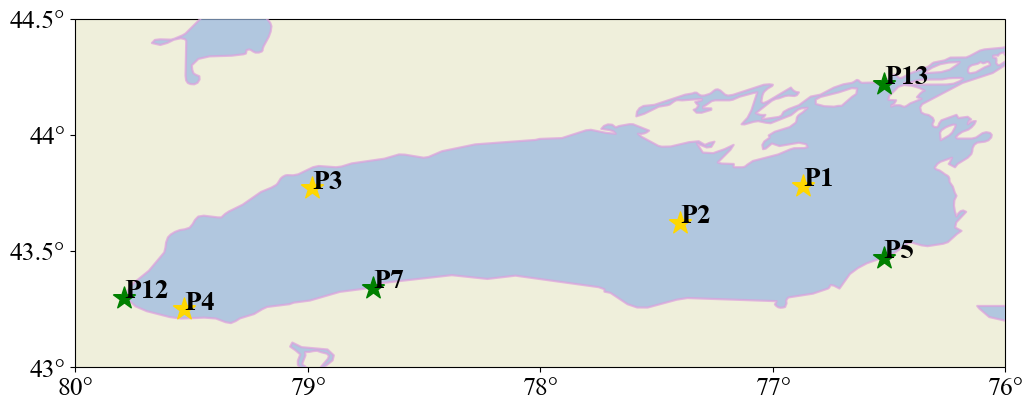

In [179]:
plt.tight_layout()
aspectRatio = 10/8
cmap = cmocean.cm.dense
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12,9.5))
ax = fig.add_subplot(111,projection=proj)

ax.set_extent([-76,-80,43,44.5],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-80,-76+1,1.0))
ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# not showing NSEW
cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.coastlines()
ax.add_feature(cfeat.LAND.with_scale('10m'), zorder=1)
ax.add_feature(cfeat.LAKES.with_scale('10m'), zorder=10, edgecolor='plum', linewidth=1.6, alpha=0.7)

stat_lon = [lon_st1, lon_st2, lon_st3, lon_st4]
stat_lat = [lat_st1, lat_st2, lat_st3, lat_st4]

stat_lon2 = [-76.5235, -78.719, -79.79, -76.52]
stat_lat2 = [43.4706, 43.34154, 43.3, 44.22]

mpl.rcParams['text.usetex'] = False
ax.scatter(stat_lon, stat_lat, zorder=10, marker='*', color='gold', s = 275)
ax.scatter(stat_lon2, stat_lat2, zorder=10, marker='*', color='green', s = 275)
anno_labels = ['P1', 'P2', 'P3', 'P4']
anno_labels2 = ['P5', 'P7', 'P12', 'P13']
for i, txt in enumerate(anno_labels):
    ax.annotate(txt, (stat_lon[i], stat_lat[i]), zorder=11, fontsize=20, weight='bold')

for i, txt in enumerate(anno_labels2):
    ax.annotate(txt, (stat_lon2[i], stat_lat2[i]), zorder=11, fontsize=20, weight='bold')

fig.savefig("station_locs", dpi=400)